# Comparar graficamente (com sobreposição das curvas) soluções do modelo malthusiano para diversas resoluções dt com a solução analítica.
## Considerar P(0) = 100 e a = 0.1

# Solução analítica
1. $\frac{dP(t)}{dt} = aP(t)$

1. $\int_{P(0)}^{P(t)}\frac{dP(t)}{P(t)} = a\int_{0}^{t}dt$

1. $\ln\left(\frac{P(t)}{P(0)}\right) = at$

1. $P(t) = P(0)\cdot e^{at}$

# Bibliotecas usadas

- numpy: cálculo
- seaborn e matplotlib: gráficos
- warnings: retirar alertas de modificações futuras das bibliotecas

In [ ]:
# Bibliotecas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Funções
- malthusiano_analytics: solução analítica do modelo malthusiano
- malthusiano_numerical: EDO do modelo malthusiano
- metodo_euler: Método de Euler para solução de EDO
- runge_kutta_4: Método de Runge-Kutta de ordem 4 para solução de EDO

In [ ]:
# Função da solução analítica
def malthusiano_analytics(t, p0 = 100, a = 0.1):
    return p0*np.exp(a*t)

In [ ]:
# Função para a solução numerica
def malthusiano_numerical(yt):
  a = 0.1
  yt = a*yt
  
  return yt

In [ ]:
def metodo_euler(f, y0, h, n):
  # res recebe todos yn
  res = np.zeros( n )
  res[0] = y0

  # Método Metodo de Euler
  for t in range(1, n):
    res[t] = f(res[t-1])*h + res[t-1]
  
  return res

In [ ]:
# Runge-Kutta ordem 4 para sistema de equação
def runge_kutta_4(f, y0, h, n):
  # res recebe todos yn
  res = np.zeros( n )
  res[0] = y0

  # Método Runge-Kutta
  for t in range(1, n):
    # K's para cada equação do sistema
    k = np.zeros( 4 )
    for i in range(4):
      k[i] = h*f(y0 + k[i-1]*h/2)
    y0 = y0 + (k[0] + 2*k[1] + 2*k[2] + k[3])/6
    # Adiciona yn em res
    res[t] = y0
  
  return res

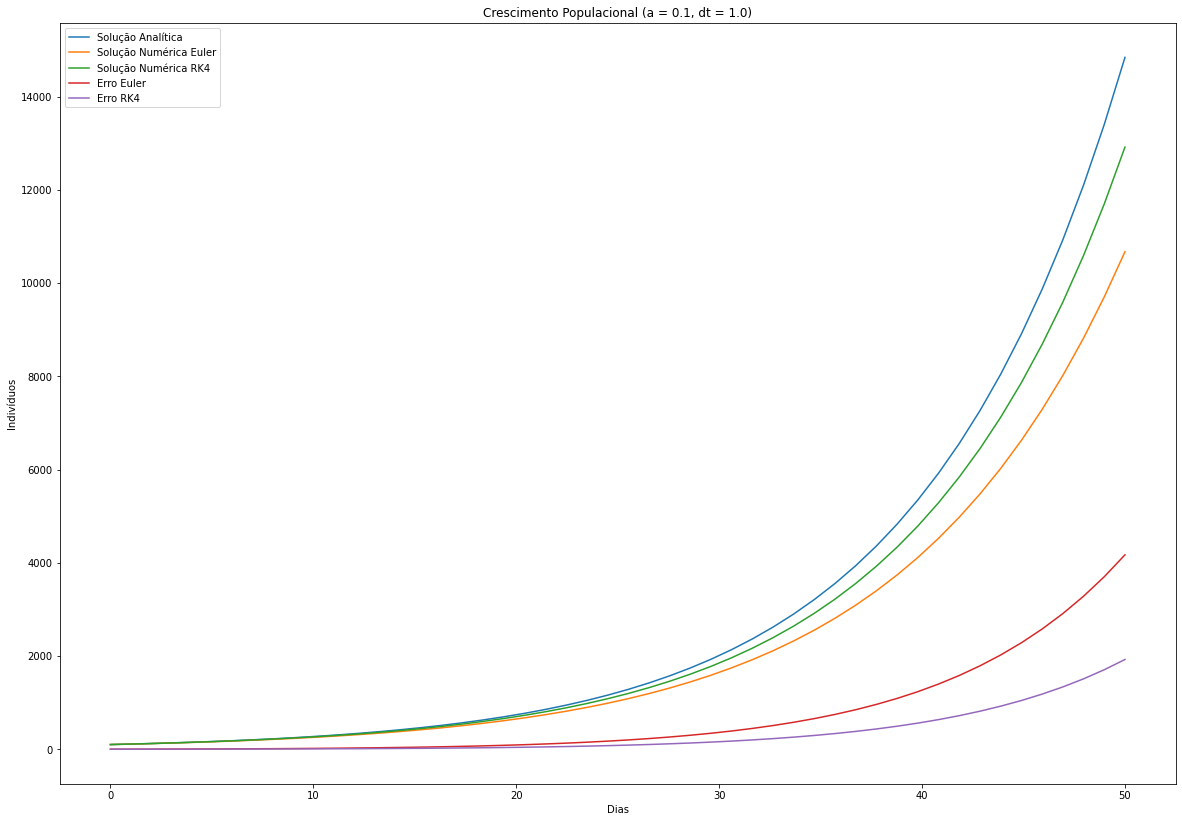

In [ ]:
#Visualização dos dados
plt.figure(figsize=(20,14))
plt.title('Crescimento Populacional (a = 0.1, dt = 1.0)')
plt.xlabel('Dias')
plt.ylabel('Indivíduos')


i_max = 50
dt = 1
n = int(i_max/dt)

t = np.linspace(0, i_max, num = n)
y_analytic = malthusiano_analytics(t, p0 = 100, a = 0.1)
y_euler = metodo_euler(malthusiano_numerical, y0 = 100, h = dt, n = n)
y_rk4 = runge_kutta_4(malthusiano_numerical, y0 = 100, h = dt, n = n)

sns.lineplot(t, y_analytic, label = 'Solução Analítica')
sns.lineplot(t, y_euler, label = 'Solução Numérica Euler')
sns.lineplot(t, y_rk4, label = 'Solução Numérica RK4')

sns.lineplot(t, y_analytic-y_euler, label = 'Erro Euler')
sns.lineplot(t, y_analytic-y_rk4, label = 'Erro RK4')
plt.show()

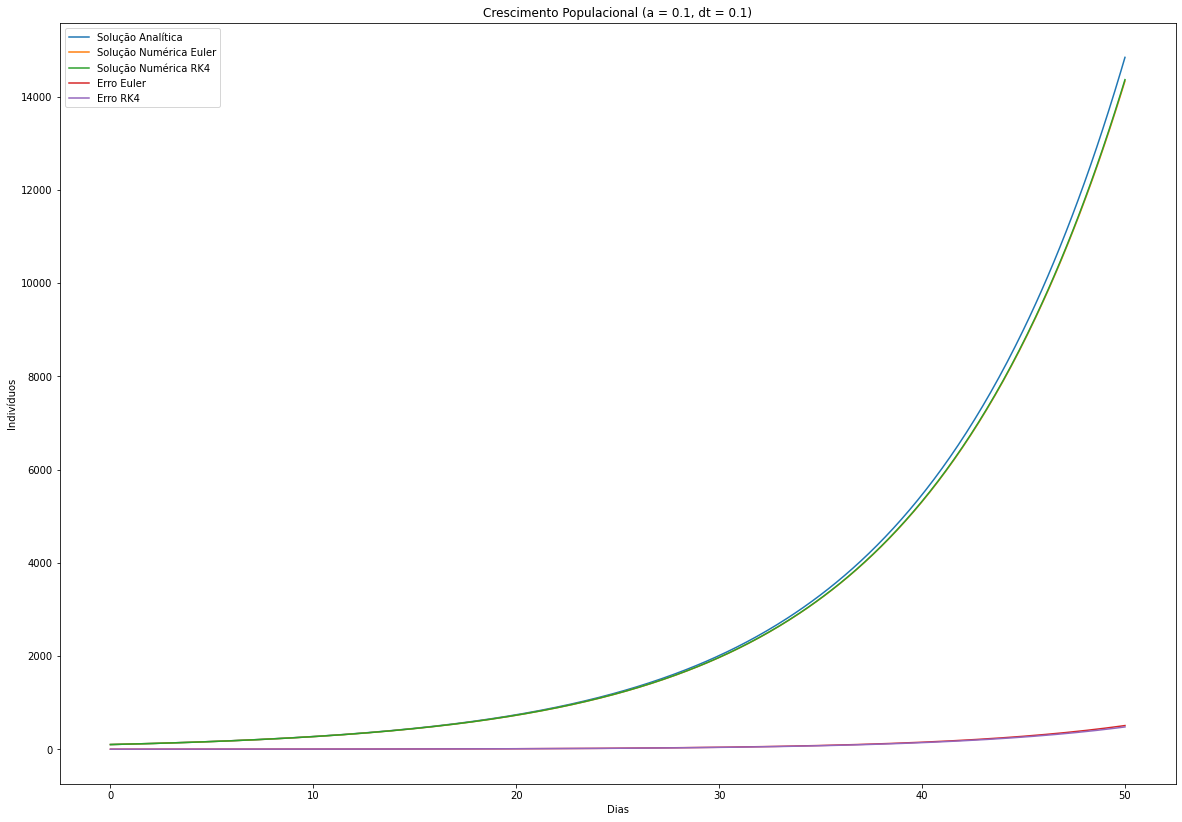

In [ ]:
#Visualização dos dados
plt.figure(figsize=(20,14))
plt.title('Crescimento Populacional (a = 0.1, dt = 0.1)')
plt.xlabel('Dias')
plt.ylabel('Indivíduos')


i_max = 50
dt = 0.1
n = int(i_max/dt)

t = np.linspace(0, i_max, num = n)
y_analytic = malthusiano_analytics(t, p0 = 100, a = 0.1)
y_euler = metodo_euler(malthusiano_numerical, y0 = 100, h = dt, n = n)
y_rk4 = runge_kutta_4(malthusiano_numerical, y0 = 100, h = dt, n = n)

sns.lineplot(t, y_analytic, label = 'Solução Analítica')
sns.lineplot(t, y_euler, label = 'Solução Numérica Euler')
sns.lineplot(t, y_rk4, label = 'Solução Numérica RK4')

sns.lineplot(t, y_analytic-y_euler, label = 'Erro Euler')
sns.lineplot(t, y_analytic-y_rk4, label = 'Erro RK4')
plt.show()

# Perguntas / Tentativa de resposta
- Por quê o modelo Malthusiano falha para populações humanas?
  - No modelo malthusiano não há consideração de revoluções tecnológicas ou pragas biológicas, que podem impusionar o crescimento populacional ou reduzir uma grande parcela dos humanos.
- Seria este modelo incompleto?
  - Atualmente sim, mas quando foi concebido não estava incompleto.
- Como alterá-lo de forma a obter maior realismo?
  - Acrescentando ao modelo as taxas de natalidade e mortalidade, já séria uma grande melhoria.